In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.sparse import hstack,vstack
from sklearn.linear_model import LogisticRegression
import taskALoader as t_a
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC,SVC
from sklearn.utils import class_weight
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import LabelEncoder

In [2]:
'''
df = pd.read_csv("task_A_dataset.csv").fillna(' ')

X_train_all, X_test = train_test_split(df, test_size=0.2, random_state=1)

X_train, X_val  = train_test_split(X_train_all, test_size=0.25, random_state=1)

X_val.to_csv("task_A_val_dataset.csv", encoding='utf-8', index=False)
'''


'\ndf = pd.read_csv("task_A_dataset.csv").fillna(\' \')\n\nX_train_all, X_test = train_test_split(df, test_size=0.2, random_state=1)\n\nX_train, X_val  = train_test_split(X_train_all, test_size=0.25, random_state=1)\n\nX_val.to_csv("task_A_val_dataset.csv", encoding=\'utf-8\', index=False)\n'

In [3]:
df = pd.read_csv("task_A_dataset.csv").fillna(' ')
data = t_a.json_creator(df)
X,y = t_a.get_data(data,post_title_weight=True)

X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=1)

['a' 'b' 'c' 'd']


In [4]:
X_train

[' I love life, but I don\'t deserve it. I love life, but I don\'t deserve it. I have squandered the many opportunities in life that I have had as an attractive white middle class male in the 1st world.  Because of my demographic, I believe any failure is completely my fault.  I have no great oppression to fight, and no story that deserves to be told.  The only thing I hate about life is myself.  My carbon emissions and human waste are my only contributions to the world.  I want to kill myself and donate my organs and my place in life to someone deserving of my opportunities.  I hate myself for being so terrible at things.  I have a great work ethic... but that is easily surpassed by someone more deserving who has natural talent and doesn\'t need to pour their life force into their work just to reach the lower middle.I\'ve:-Dropped out of music school-Tried to learn Spanish for 9 years, yet still am not fluent-Desperately hemmhoragged any extra spending money to save an emergency fund 

In [5]:
df_from_json = df.from_dict(data)

In [6]:
df_from_json.head()

,label,posts,user_id
0,d,"[[2injb4, 1412770416, SuicideWatch, I can't se...",16
1,c,"[[10izh0, 1348693543, SuicideWatch, For a frie...",56
2,c,"[[2oyc4z, 1418283108, SuicideWatch, I've been ...",137
3,a,"[[15zrrk, 1357362241, SuicideWatch, I cant do ...",152
4,c,"[[2jqzr0, 1413772908, SuicideWatch, Is it poss...",370


In [7]:
user_postss = list(df_from_json['posts'])

In [8]:
user_postss[0]

[['2injb4',
  1412770416,
  'SuicideWatch',
  "I can't see another way out.",
  "I'm stuck and I hate it. I have zero confidence in myself, my abilities, my future. I'm stuck in a dead end job that I want badly to get out of, but every time I consider university courses or a better, more technical career, I choke and get terrified. I have no confidence that i'll ever be able to get out of the state i'm in now. I don't want to be doing this for the rest of my life. Right now I think the only thing keeping me alive is the fact that I don't want to put my parents through their son killing himself. Other than that, my future seems hopeless and bleak, i'm not confident enough that I can get the skills I need to change it. And I just think dying would be so much easier than trying and failing to change everything."],
 ['2s3if4',
  1421012448,
  'SuicideWatch',
  "Nothing is working and i'm sliding back down.",
  "The more I think about things the more depressed I get and the more I consider 

In [9]:

all_posts = []

    
for user in user_postss:
    one_user_posts = ''
    for post_details in user:
        one_user_posts=one_user_posts+" "+str(post_details[3])+" "+str(post_details[3])+" "+str(post_details[4])
    all_posts.append(one_user_posts)



In [10]:
df_from_json['data'] = all_posts

lb_make = LabelEncoder()
df_from_json["class"] = lb_make.fit_transform(df_from_json["label"])


In [11]:
train_all_df,test_df= train_test_split(df_from_json, test_size=0.2, random_state=1)

train_df, val_df = train_test_split(train_all_df,test_size=0.25, random_state=1)



In [12]:
val_df.head()

,label,posts,user_id,data,class
113,c,"[[9yng4, 1256743121, SuicideWatch, A survivors...",10869,A survivors story A survivors story Truthfull...,2
319,d,"[[jvrrt, 1314412249, SuicideWatch, I don't thi...",33604,I don't think I can take anymore. [Long] I do...,3
220,b,"[[35z7ac, 1431631007, SuicideWatch, When does ...",21485,When does it become okay? When does it become...,1
20,a,"[[22ie72, 1396959876, SuicideWatch, /r/gaming ...",2103,"/r/gaming sent me here, help for a digital fr...",0
455,a,"[[20vl2e, 1395289098, SuicideWatch, My friend ...",48651,My friend and roommate told me he tried to co...,0


{0: 31, 1: 8, 2: 21, 3: 40}
31.0
8.0
21.0
40.0


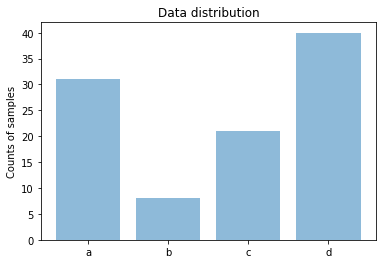

In [13]:
t_a.display_class_dis(y_test)

In [14]:
corpus_df = pd.read_csv("clpsych19_training_data/shared_task_posts.csv").fillna(' ')
p_title = corpus_df['post_title']
p_body = corpus_df['post_body']
corpus_text = pd.concat([p_title,p_body]) 

In [15]:
def get_predefined_split(features_train, features_val, target_train, target_val):
    always_train = np.empty((target_train.shape[0]), dtype=np.int32)
    #print(target_train.shape[0])
    always_train[:] = -1
    always_validate = np.empty((target_val.shape[0]), dtype=np.int32)
    always_validate[:] = 0
    pred_split_indices = np.concatenate((always_train, always_validate))
    curr_target_train = np.concatenate((target_train, target_val))
    #curr_features_train = vstack((features_train, features_val))
    curr_features_train = np.concatenate((features_train, features_val))
    
    ps = PredefinedSplit(test_fold=pred_split_indices)
    
    return curr_features_train, curr_target_train, ps

In [16]:
class TfidfVectorizerWrapper(TfidfVectorizer):
    def fit(self,x,y=None, **fit_params):
        x = corpus_text
        return super(TfidfVectorizerWrapper, self).fit(x, y, **fit_params)
        
    def transform(self, x, y=None, **fit_params):
        #x = [content.split('\t')[0] for content in x]  # filtering the input
        return super(TfidfVectorizerWrapper, self).transform(x, y, **fit_params)       

In [17]:
def logistic_param_selection(X_train,X_val,y_train,y_val):
    

    
    linear_pipeline = Pipeline(
        [
            ('tfidf',
             TfidfVectorizerWrapper(decode_error='ignore', use_idf=True, ngram_range=(1, 2), lowercase=True,
                             stop_words='english',
                             analyzer='word', max_features=40000)),
            ('classifier', LogisticRegression(class_weight='balanced',max_iter=2000))]
    )

    
    
    ngram_range=[(1, 2), (1, 3), (1, 4), (1, 5)]
    #max_features=[100000, 200000, 300000, 400000, 500000]
    max_features = [200000,500000,600000,700000]
    min_df=[1, 2, 3]
    
    
    
    X,y,ps = get_predefined_split (X_train,X_val,y_train,y_val)
    
  
    #Logistic Regression hyperparameters
    penalty = ['l2']
    Cs = [0.001, 0.01, 0.1, 1, 10]
    multi_class = ['multinomial']
    solver = ['newton-cg', 'lbfgs', 'sag']
    
    param_grid = {"tfidf__ngram_range": ngram_range,
                  "tfidf__use_idf": [True],
                  "tfidf__max_features": max_features,
                  "tfidf__min_df": min_df,
                  "tfidf__sublinear_tf": [True],
                  "classifier__C": Cs,
                  "classifier__multi_class":multi_class,
                  "classifier__solver":solver,
                  "classifier__penalty":penalty
                 
                 }
                             
    
   

    grid_search = GridSearchCV(linear_pipeline, param_grid,cv=ps,scoring='f1_macro', refit=False)

    clf=grid_search.fit(X, y)
 
    
    grid_search.best_params_
    return grid_search.best_params_,clf

In [156]:
import warnings
warnings.filterwarnings('ignore')

X_train = train_df['data']
y_train = train_df['class']
X_val = val_df['data']
y_val = val_df['class']

best_pars,model = logistic_param_selection(X_train,X_val,y_train,y_val)


99
396


KeyboardInterrupt: 

In [160]:
print(best_pars)

{'classifier__C': 1, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg', 'tfidf__max_features': 200000, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 3), 'tfidf__sublinear_tf': True, 'tfidf__use_idf': True}


# Leave one out 

In [30]:
def runBestLogistic(train,train_labels,test,best_pars):
    
    
    c = best_pars['classifier__C']
    multi_class = best_pars['classifier__multi_class']
    penalty = best_pars['classifier__penalty']
    solver = best_pars['classifier__solver']
    
    
    max_features = best_pars['tfidf__max_features']
    min_df = best_pars['tfidf__min_df']
    ngram_range=best_pars['tfidf__ngram_range']
    sublinear_tf = best_pars['tfidf__sublinear_tf']
    use_idf = best_pars['tfidf__use_idf']
    
    
    
    linear_pipeline = Pipeline(
        [
            ('tfidf',
             TfidfVectorizerWrapper(decode_error='ignore', 
                                    ngram_range=ngram_range, lowercase=True,stop_words='english',
                             analyzer='word', max_features=max_features,min_df=min_df,
                                    sublinear_tf=sublinear_tf,use_idf=use_idf)),
            
            ('classifier', LogisticRegression(C=c,penalty = penalty,solver=solver,multi_class=multi_class,class_weight='balanced',max_iter=40000))]
    )
    
    
    
    
 
    linear_pipeline.fit(train,train_labels)
    #predicted=linear_pipeline.predict_proba([test])   #one test instance
    predicted=linear_pipeline.predict_proba(test)     #multiple test instances
    #predicted = linear_pipeline.decision_function([test])
    #print(classification_report(test_labels, predicted))
    #print ("Accuracy: {}".format(accuracy_score(test_labels, predicted)))
    return predicted
    #return clf

In [162]:
#model = runBestLogistic(X_train,y_train,X_val,y_val,best_pars)
#runBestLogistic(X_train,y_train,X_test,y_test,best_pars)

In [18]:
import json

with open('saved_best_pars/Logistic_finalized_model_run2_best_pars.json') as f:
    best_pars1 = json.load(f)

In [40]:
#best_pars['classifier__C']=1.2
best_pars1

{'classifier__C': 1,
 'classifier__multi_class': 'multinomial',
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg',
 'tfidf__max_features': 200000,
 'tfidf__min_df': 3,
 'tfidf__ngram_range': [1, 3],
 'tfidf__sublinear_tf': True,
 'tfidf__use_idf': True}

In [27]:
'''
import pickle
X_train = train_df['data']
y_train = train_df['class']
X_val = val_df['data']
X_test=test_df['data']

b_model = runBestLogistic(X_train,y_train,X_val,best_pars1)
filename = 'B000_LR_model_trial_basic.sav'


pickle.dump(b_model, open(filename, 'wb'))
'''

In [46]:
'''

#all_X = df_from_json['data']

all_X = df_from_json['data']
all_y = df_from_json['class']
import pickle
b_model = runBestLogistic(all_X,all_y,X_val,best_pars)
filename = 'B000_LR_model.sav'


pickle.dump(b_model, open(filename, 'wb'))
'''

In [39]:
'''
def runBestLogisticFromModel(model,test):
    


    #predicted=linear_pipeline.predict_proba([test])   #one test instance
    predicted=model.predict_proba(test)     #multiple test instances
    #predicted = linear_pipeline.decision_function([test])
    #print(classification_report(test_labels, predicted))
    #print ("Accuracy: {}".format(accuracy_score(test_labels, predicted)))
    return predicted

import pickle

f = 'saved_models/LR_model.sav'

pickle_off = open(f,"rb")


lr_model = pickle.load(pickle_off)
'''

'\ndef runBestLogisticFromModel(model,test):\n    \n\n\n    #predicted=linear_pipeline.predict_proba([test])   #one test instance\n    predicted=model.predict_proba(test)     #multiple test instances\n    #predicted = linear_pipeline.decision_function([test])\n    #print(classification_report(test_labels, predicted))\n    #print ("Accuracy: {}".format(accuracy_score(test_labels, predicted)))\n    return predicted\n\nimport pickle\n\nf = \'saved_models/LR_model.sav\'\n\npickle_off = open(f,"rb")\n\n\nlr_model = pickle.load(pickle_off)\n'

# Out of fold estimate (OOFE) for 297 train set

In [166]:
import time
#all_X = list(df_from_json['data'])
#all_y = list(df_from_json['class'])

all_X = list(train_df['data'])
all_y = list(train_df['class'])


pred_probs = []
t1 = time.time()
for i, post in enumerate(all_X):
    
    
    
    X_train = all_X[:i] + all_X[i+1:]
    y_train = all_y[:i] + all_y[i+1:]
    
    
    
    X_val = post
    #pred_probs.append(runBestLogistic(X_train,y_train,X_val,best_pars))
    p=runBestLogistic(X_train,y_train,X_val,best_pars1)
    pred_probs.append(p[0].tolist())
    
t2 = time.time()
print(t2-t1)

136.83942818641663


In [167]:
pred_probs[0]

[0.21128684236470366,
 0.21128261013250116,
 0.2509371202644879,
 0.3264934272383074]

In [168]:
X_train = train_df['data']
y_train = train_df['class']
X_val = val_df['data']
X_test=test_df['data']

In [31]:
val_probs = runBestLogistic(X_train,y_train,X_val,best_pars1)
test_probs = runBestLogistic(X_train,y_train,X_test,best_pars1)

In [32]:
val_probs[0]

array([0.28207342, 0.20616349, 0.21438925, 0.29737385])

In [38]:
val_probs[0]

array([0.28207342, 0.20616349, 0.21438925, 0.29737385])

In [172]:
for prob in val_probs:
    #print(prob.tolist())
    pred_probs.append(prob.tolist())

In [173]:
for prob in test_probs:
    
    pred_probs.append(prob.tolist())

In [175]:
cls_a = []
cls_b = []
cls_c = []
cls_d = []


for prob in pred_probs:
    cls_a.append(prob[0])
    cls_b.append(prob[1])
    cls_c.append(prob[2])
    cls_d.append(prob[3])

df_from_json['a_prob'] = cls_a 
df_from_json['b_prob'] = cls_b    
df_from_json['c_prob'] = cls_c
df_from_json['d_prob'] = cls_d

In [177]:
df_from_json.tail()

,label,posts,user_id,a_prob,b_prob,c_prob,d_prob
491,d,"[[1znwij, 1394057091, SuicideWatch, I've reach...",51455,0.215159,0.266168,0.229396,0.289278
492,a,"[[f4nul, 1295384611, SuicideWatch, So you may ...",51498,0.208060,0.220717,0.291519,0.279704
493,a,"[[8oi1j, 1243704412, SuicideWatch, Can someone...",51526,0.199669,0.250255,0.239477,0.310600
494,a,"[[1dj39o, 1367465772, SuicideWatch, Good words...",51643,0.189859,0.226904,0.219804,0.363433
495,c,"[[h3vh5, 1304501676, SuicideWatch, I'm on the ...",51883,0.238863,0.228783,0.230964,0.301390


In [105]:
df_from_json['posts'] = df_from_json['posts'].astype(object)

In [106]:
df_from_json.head()

df_from_json.to_csv("NewDataSet_with_Probs_297.csv", encoding='utf-8', index=False)

In [121]:
for i,item in enumerate(a):
    test = item
    train = a[:i]+a[i+1:]
    print(test,train)

12 [44, 45, 34]
44 [12, 45, 34]
45 [12, 44, 34]
34 [12, 44, 45]


In [81]:
import pickle

filename = 'Logistic_finalized_model_run2.sav'

'''
pickle.dump(model, open(filename, 'wb'))

import json
with open(filename+'best_pars.json', 'w') as fp:
    json.dump(best_pars, fp)
'''    
loaded_model = pickle.load(open(filename, 'rb'))